In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform =transforms.ToTensor()

In [5]:
train_data=datasets.MNIST(root="E:/github/mini_projects",train=True,download=True,transform=transform)
test_data=datasets.MNIST(root="E:/github/mini_projects",train=True,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1529662.33it/s]


Extracting E:/github/mini_projects\MNIST\raw\train-images-idx3-ubyte.gz to E:/github/mini_projects\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 87281.23it/s]


Extracting E:/github/mini_projects\MNIST\raw\train-labels-idx1-ubyte.gz to E:/github/mini_projects\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 841636.93it/s] 


Extracting E:/github/mini_projects\MNIST\raw\t10k-images-idx3-ubyte.gz to E:/github/mini_projects\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting E:/github/mini_projects\MNIST\raw\t10k-labels-idx1-ubyte.gz to E:/github/mini_projects\MNIST\raw



In [6]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=True)

In [7]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)

In [9]:
model=ConvolutionalNetwork()

In [10]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [11]:
import time
start_time=time.time()
epochs=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for batch,(x_train,y_train) in enumerate(train_loader):
        batch+=1
        y_predicted=model(x_train)
        loss=criterion(y_predicted,y_train)
        predicted=torch.max(y_predicted.data,1)[1]
        batch_correct= (predicted== y_train).sum()
        trn_corr += batch_correct
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss)
    train_correct.append(trn_corr)


    with torch.no_grad():
        for batch,(x_test,y_test) in enumerate (test_loader):
            y_value=model(x_test)
            predicted=torch.max(y_value.data,1)[1]
            tst_corr += (predicted==y_test).sum()
    loss=criterion(y_value,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time=time.time()
total_time=current_time-start_time
print(f"Time taken : {total_time}")

Time taken : 215.1321668624878


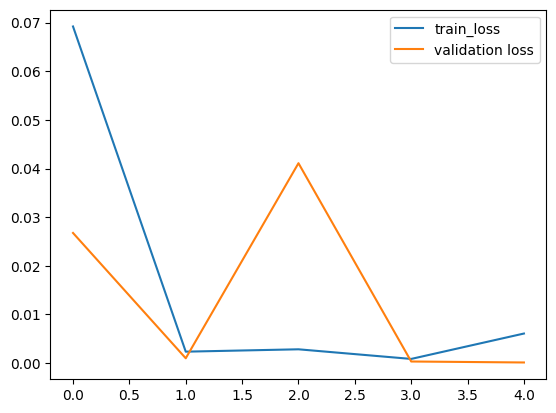

In [12]:
num_train_losses=[i.detach().numpy() for i in train_losses]
num_test_losses=[i.detach().numpy() for i in test_losses]
plt.plot(num_train_losses,label='train_loss')
plt.plot(num_test_losses,label='validation loss')
plt.legend()

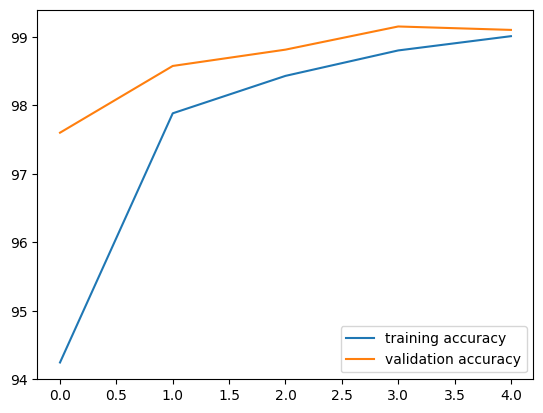

In [13]:
plt.plot([t/600 for t in train_correct],label='training accuracy')
plt.plot([t/600 for t in test_correct],label='validation accuracy')
plt.legend();

In [14]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [15]:
with torch.no_grad():
    correct = 0
    for x_test, y_test in test_load_all:
        y_val = model(x_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 59462/60000 =  99.103%


In [16]:
misses=[]
num_y_predicted=[i for i in predicted]
num_y_test=[i for i in y_test]
for i in range(len(num_y_predicted)):
    if((num_y_predicted[i]) != (y_test[i])):
        misses.append(y_test[i])
for i in misses:
    print(i)

print(f"Number of misses are :{len(misses)}")

tensor(7)
tensor(9)
tensor(8)
tensor(7)
tensor(2)
tensor(9)
tensor(9)
tensor(7)
tensor(5)
tensor(7)
tensor(9)
tensor(9)
tensor(7)
tensor(2)
tensor(6)
tensor(2)
tensor(4)
tensor(2)
tensor(6)
tensor(8)
tensor(9)
tensor(7)
tensor(7)
tensor(5)
tensor(8)
tensor(7)
tensor(2)
tensor(5)
tensor(2)
tensor(5)
tensor(7)
tensor(9)
tensor(9)
tensor(4)
tensor(7)
tensor(7)
tensor(7)
tensor(5)
tensor(2)
tensor(8)
tensor(7)
tensor(7)
tensor(9)
tensor(3)
tensor(7)
tensor(4)
tensor(9)
tensor(7)
tensor(7)
tensor(4)
tensor(5)
tensor(7)
tensor(9)
tensor(4)
tensor(9)
tensor(7)
tensor(7)
tensor(5)
tensor(2)
tensor(4)
tensor(2)
tensor(2)
tensor(4)
tensor(9)
tensor(9)
tensor(5)
tensor(7)
tensor(7)
tensor(7)
tensor(7)
tensor(7)
tensor(9)
tensor(9)
tensor(9)
tensor(2)
tensor(7)
tensor(7)
tensor(7)
tensor(7)
tensor(5)
tensor(3)
tensor(7)
tensor(7)
tensor(5)
tensor(2)
tensor(7)
tensor(7)
tensor(7)
tensor(4)
tensor(7)
Number of misses are :90


In [18]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 991    0    2    0    1    2    0    1    0    3]
 [   0 1064    7    0    5    0    0   10    0    2]
 [   0    0  978    0    0    1    0    4    1    0]
 [   0    0    1 1028    0    3    0    8    0    2]
 [   0    0    0    0  975    0    1    2    0    6]
 [   0    0    0    1    0  905    0    1    1    0]
 [   0    0    0    0    0    1  965    0    0    0]
 [   0    0    0    0    0    0    0 1055    0    1]
 [   0    0    2    1    0    3    1    2 1005    3]
 [   0    0    0    0    2    0    0    7    2  944]]
